# Study My spectra

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : April 1st 2021
- version 

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import imp
MODULE_EXTENSIONS = ('.py', '.pyc', '.pyo')

In [3]:
def package_contents(package_name):
    file, pathname, description = imp.find_module(package_name)
    if file:
        raise ImportError('Not a package: %r', package_name)
    # Use a set because some may be both source and compiled.
    return set([os.path.splitext(module)[0]
        for module in os.listdir(pathname)
        if module.endswith(MODULE_EXTENSIONS)])

In [4]:
package_contents("spectractor")

{'__init__',
 '_version',
 'astrometry',
 'config',
 'logbook',
 'parameters',
 'tools'}

In [5]:
package_contents("spectractor/extractor")

{'__init__',
 'background',
 'chromaticpsf',
 'dispersers',
 'extractor',
 'images',
 'psf',
 'spectroscopy',
 'spectrum',
 'targets'}

# Import

In [6]:
from spectractor.extractor.spectrum import Spectrum
from spectractor.config import load_config

# Configuration

In [7]:
config = "config/auxtel_quicklook.ini"
load_config(config)

# Logbook

In [8]:
filename_logbook='logbooks/auxtellogbook_2021_v1.2.csv'
#filename_logbook='logbooks/ctiofulllogbook_jun2017_v5.csv'

In [9]:
df=pd.read_csv(filename_logbook)

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
df

Unnamed: 0  index                     date  \
0            0      0  2021-02-17T01:45:09.091   
1            1      1  2021-02-17T03:37:12.647   
2            2      2  2021-02-18T07:25:02.387   
3            3      3  2021-02-18T07:25:46.560   
4            4      4  2021-02-18T07:26:07.146   
5            5      5  2021-02-18T07:26:18.957   
6            6      6  2021-02-18T07:26:43.049   
7            7      7  2021-02-18T07:26:51.615   
8            8      8  2021-02-18T07:27:00.190   
9            9      9  2021-02-18T07:27:53.863   
10          10     10  2021-02-18T07:29:41.903   
11          11     11  2021-02-19T05:53:27.926   
12          12     12  2021-02-19T05:55:59.153   
13          13     13  2021-02-19T05:56:26.421   
14          14     14  2021-02-19T05:59:48.510   
15          15     15  2021-02-19T06:02:10.932   
16          16     16  2021-02-19T06:03:07.565   
17          17     17  2021-02-19T06:03:51.105   
18          18     18  2021-02-19T06:04:27.300   
19          19     19  2021-02-19T06:05:05.010   
20          20     20  2021-02-19T06:06:29.575   
21          21     21  2021-02-19T06:06:53.561   
22          22     22  2021-02-19T06:07:09.034   
23          23     23  2021-02-19T06:07:49.989   
24          24     24  2021-02-19T06:09:04.533   
25          25     25  2021-02-19T06:09:36.863   
26          26     26  2021-02-19T06:11:51.450   
27          27     27  2021-02-19T06:12:39.359   
28          28     28  2021-02-19T06:13:21.360   
29          29     29  2021-02-19T06:13:36.394   
30          30     30  2021-02-19T06:13:43.043   
31          31     31  2021-02-19T06:13:50.035   
32          32     32  2021-02-19T06:13:57.849   
33          33     33  2021-02-19T06:14:06.963   
34          34     34  2021-02-19T06:14:16.655   
35          35     35  2021-02-19T06:14:25.695   
36          36     36  2021-02-19T06:14:35.269   
37          37     37  2021-02-19T06:15:14.640   
38          38     38  2021-02-19T06:15:29.988   
39          39     39  2021-02-19T06:15:42.966   
40          40     40  2021-02-19T06:16:00.336   
41          41     41  2021-02-19T06:16:42.390   
42          42     42  2021-02-19T06:18:37.431   
43          43     43  2021-02-19T06:25:48.342   
44          44     44  2021-02-19T06:26:07.604   
45          45     45  2021-02-19T06:26:35.551   
46          46     46  2021-02-19T06:28:33.570   
47          47     47  2021-02-19T06:29:01.054   
48          48     48  2021-03-12T01:01:30.478   
49          49     49  2021-03-12T01:02:00.570   
50          50     50  2021-03-12T01:02:28.770   
51          51     51  2021-03-12T01:23:46.224   
52          52     52  2021-03-12T01:24:21.169   
53          53     53  2021-03-12T01:24:42.413   
54          54     54  2021-03-12T02:45:25.087   
55          55     55  2021-03-12T02:47:31.346   
56          56     56  2021-03-12T02:48:00.283   
57          57     57  2021-03-12T02:48:29.927   
58          58     58  2021-03-12T02:48:58.831   
59          59     59  2021-03-12T02:49:27.942   
60          60     60  2021-03-12T02:49:57.673   
61          61     61  2021-03-12T02:50:27.091   
62          62     62  2021-03-12T02:50:56.136   
63          63     63  2021-03-12T02:51:25.196   
64          64     64  2021-03-12T02:51:54.248   
65          65     65  2021-03-12T02:52:23.352   
66          66     66  2021-03-12T02:52:52.463   
67          67     67  2021-03-12T02:53:21.563   
68          68     68  2021-03-12T02:53:51.050   
69          69     69  2021-03-12T02:54:20.571   
70          70     70  2021-03-12T02:54:49.518   
71          71     71  2021-03-12T02:55:18.628   
72          72     72  2021-03-12T02:55:47.723   
73          73     73  2021-03-12T02:56:17.274   
74          74     74  2021-03-12T02:56:46.922   
75          75     75  2021-03-12T02:57:15.859   

                                                 path  \
0   /sps/lsst/groups/auxtel/data/2021/holo/FlipCleans   
1   /sps/lsst/groups/auxtel/data/2021/h

# Select good spectra

In [12]:
df_good=df[df["quality"]==1]

In [13]:
for spectra_file in df_good["file"]:
    print(spectra_file)
    

Cor_holo4_003_NGC4755_2021-02-17_350.fits
Cor_holo4_003_NGC4755_2021-02-17_351.fits
Cor_holo4_003_NGC4755_2021-02-17_352.fits
Cor_holo4_003_NGC4755_2021-02-17_353.fits
Cor_holo4_003_NGC4755_2021-02-17_354.fits
Cor_holo4_003_NGC4755_2021-02-17_355.fits
Cor_holo4_003_NGC4755_2021-02-17_356.fits
Cor_holo4_003_NGC4755_2021-02-17_357.fits
Cor_holo4_003_NGC4755_2021-02-17_358.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_556.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_559.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_560.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_561.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_562.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_563.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_564.fits
Cor_holo4_003_empty_HD60753_2021-02-18_566.fits
Cor_holo4_003_empty_HD60753_2021-02-18_567.fits
Cor_holo4_003_empty_HD60753_2021-02-18_568.fits
Cor_holo4_003_empty_HD60753_2021-02-18_569.fits
Cor_holo4_003_empty_HD60753_2021-02-18_570.fits
Cor_holo4_003_empty_HD60753_2021-02-18_571.fit

# View good Reconstructed spectra

In [14]:
dir_spectra="outputs"

In [15]:
all_files=os.listdir(dir_spectra)

In [16]:
all_spectra_files = []
for filename in all_files:
    if re.search("_spectrum.fits$",filename):
        all_spectra_files.append(filename)
N=len(all_spectra_files)

In [17]:
all_good_spectra_spectrum_files=[]

for good_spectra_file in df_good["file"]:
    good_spectra_spectrum_file = good_spectra_file.split(".")[0]+"_spectrum.fits"
    if good_spectra_spectrum_file in all_spectra_files:
        print("found {}".format(good_spectra_spectrum_file))
        all_good_spectra_spectrum_files.append(good_spectra_spectrum_file)
    

found Cor_holo4_003_NGC4755_2021-02-17_350_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_352_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_353_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_354_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_355_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_356_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_357_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_358_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_556_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_559_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_560_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_561_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_562_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_563_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_564_spectrum.fits
found Cor_holo4_003_empty_HD60753_2021-02-18_566_spectrum.fits
found Cor_holo4_003_empty_HD60753_2021-0

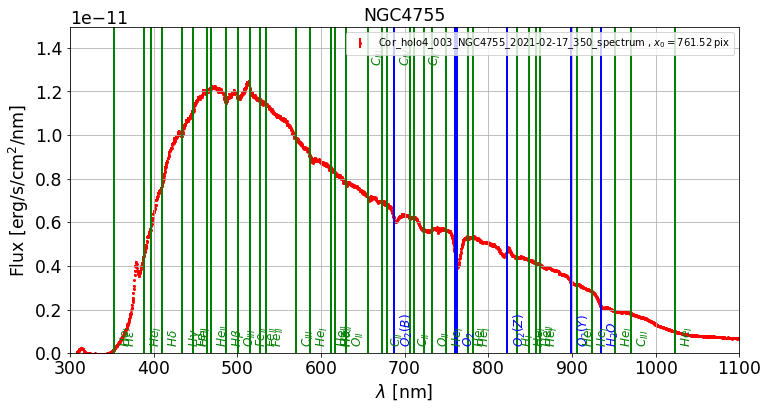

outputs/Cor_holo4_003_NGC4755_2021-02-17_350_spectrogram.fits


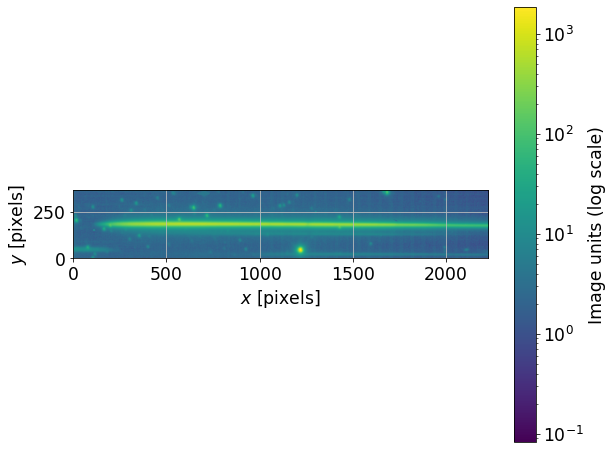

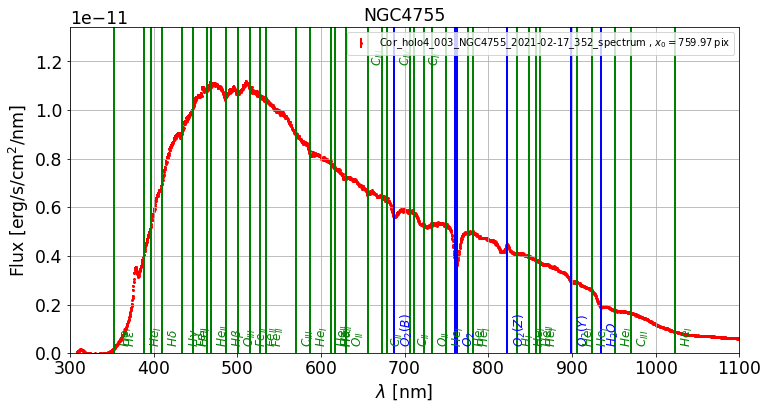

outputs/Cor_holo4_003_NGC4755_2021-02-17_352_spectrogram.fits


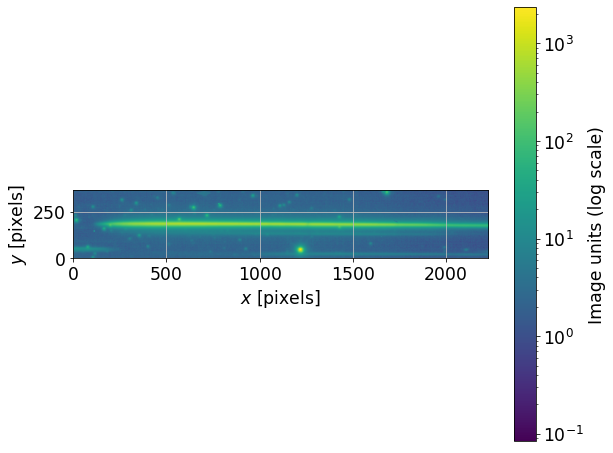

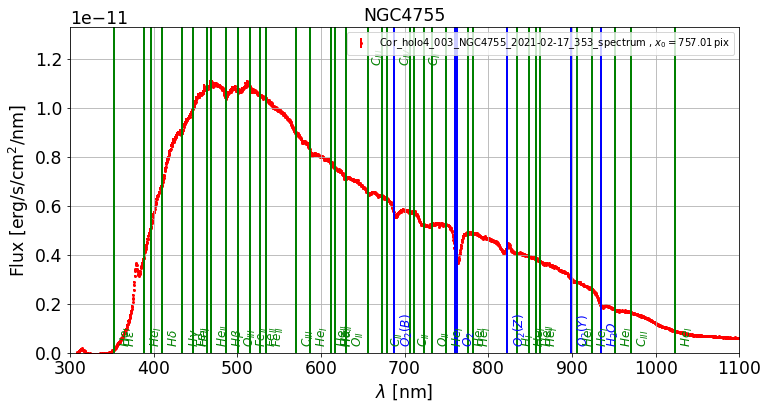

outputs/Cor_holo4_003_NGC4755_2021-02-17_353_spectrogram.fits


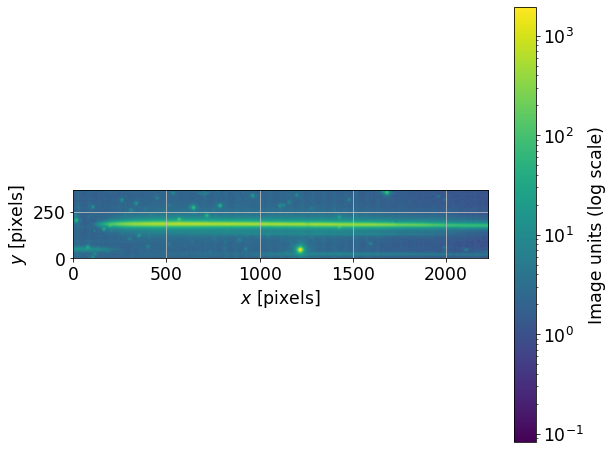

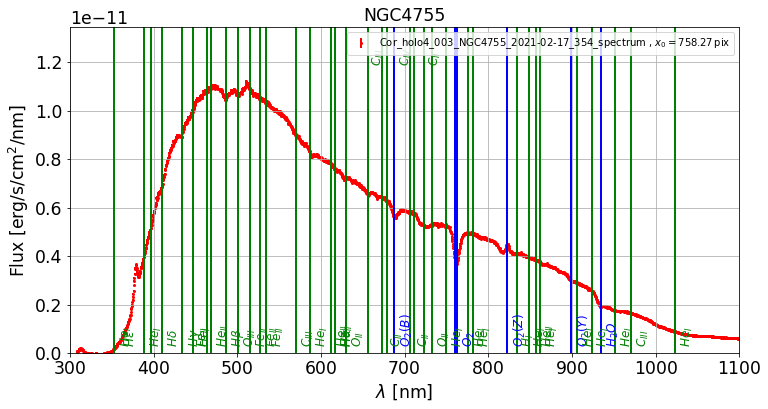

outputs/Cor_holo4_003_NGC4755_2021-02-17_354_spectrogram.fits


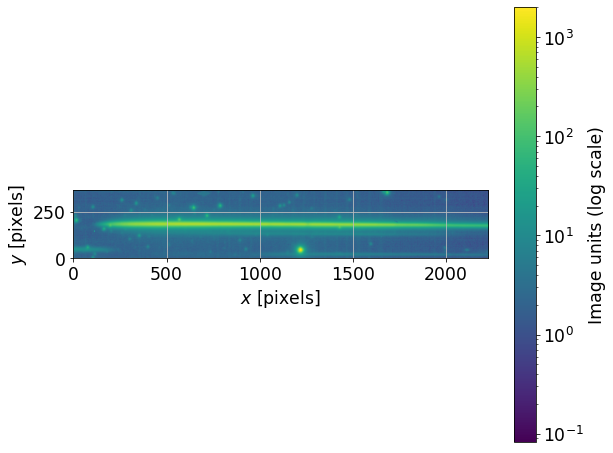

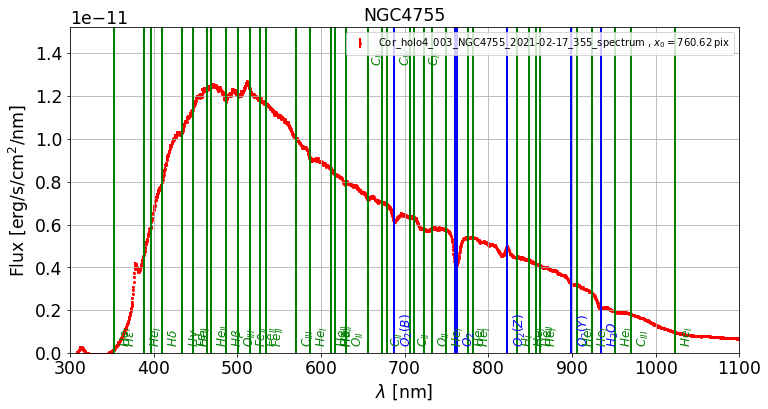

outputs/Cor_holo4_003_NGC4755_2021-02-17_355_spectrogram.fits


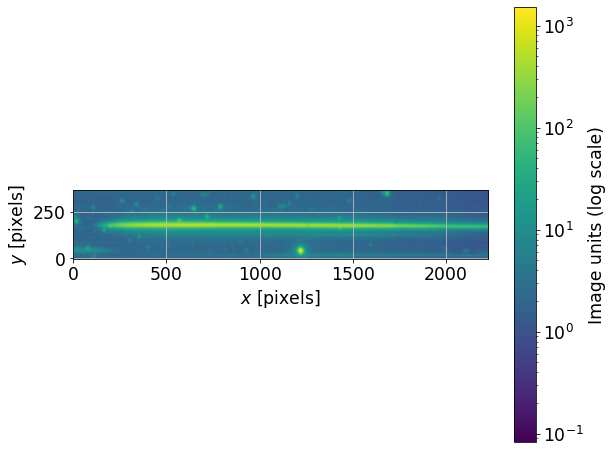

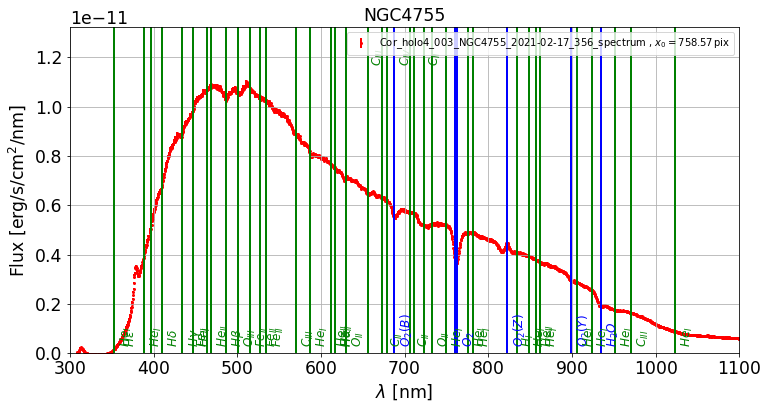

outputs/Cor_holo4_003_NGC4755_2021-02-17_356_spectrogram.fits


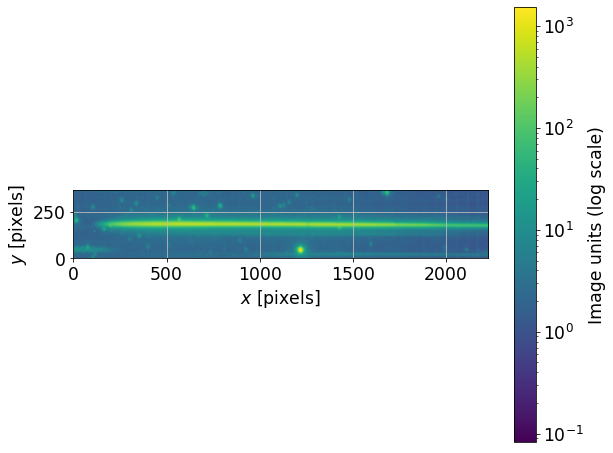

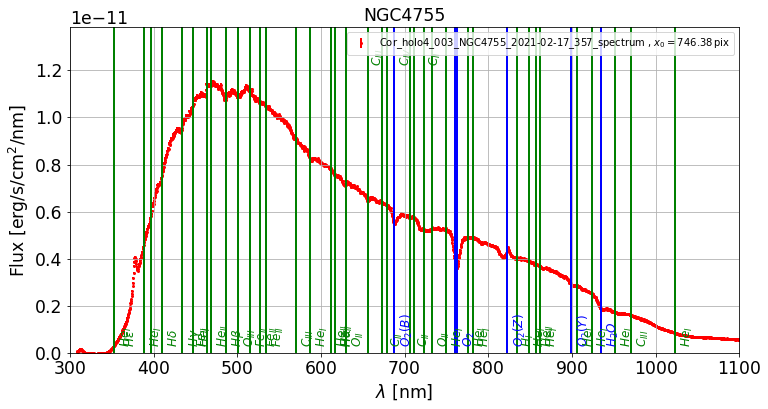

outputs/Cor_holo4_003_NGC4755_2021-02-17_357_spectrogram.fits


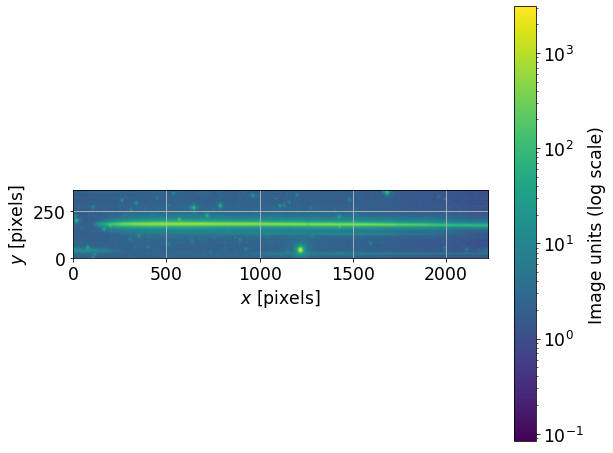

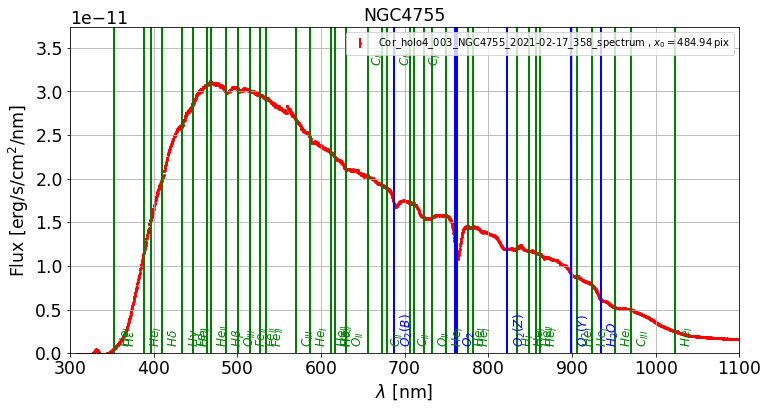

outputs/Cor_holo4_003_NGC4755_2021-02-17_358_spectrogram.fits


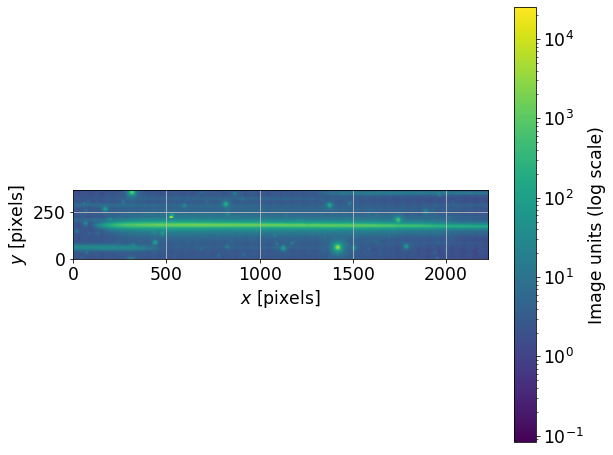

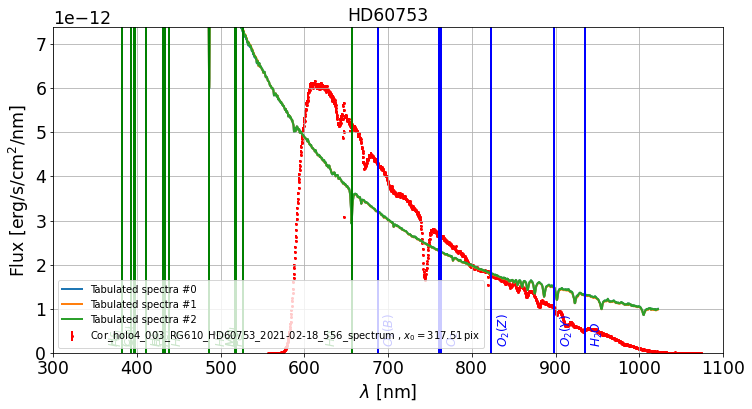

outputs/Cor_holo4_003_RG610_HD60753_2021-02-18_556_spectrogram.fits


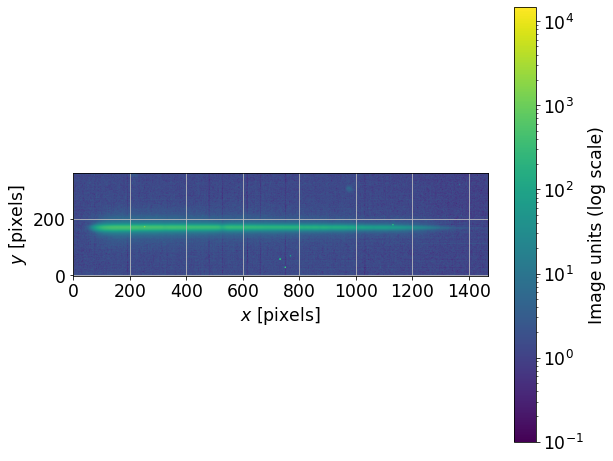

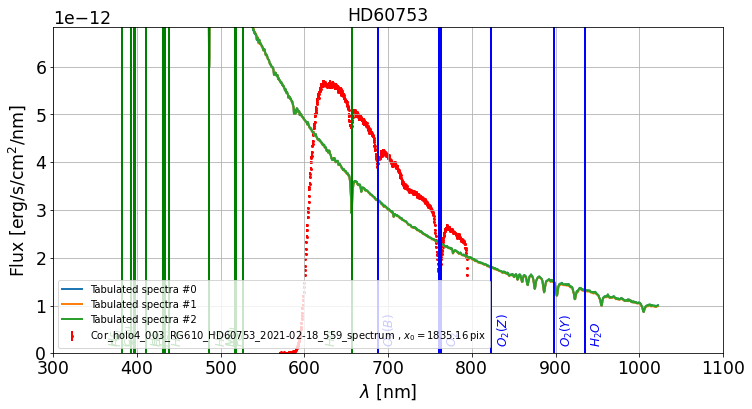

outputs/Cor_holo4_003_RG610_HD60753_2021-02-18_559_spectrogram.fits


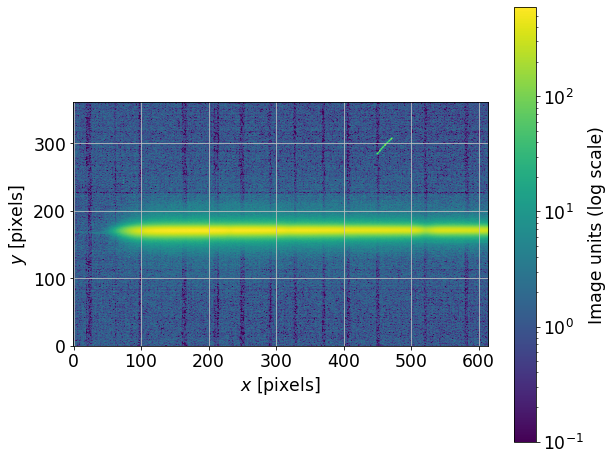

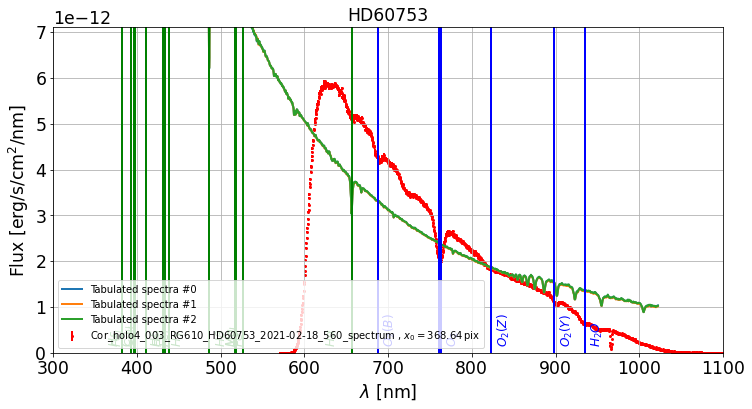

outputs/Cor_holo4_003_RG610_HD60753_2021-02-18_560_spectrogram.fits


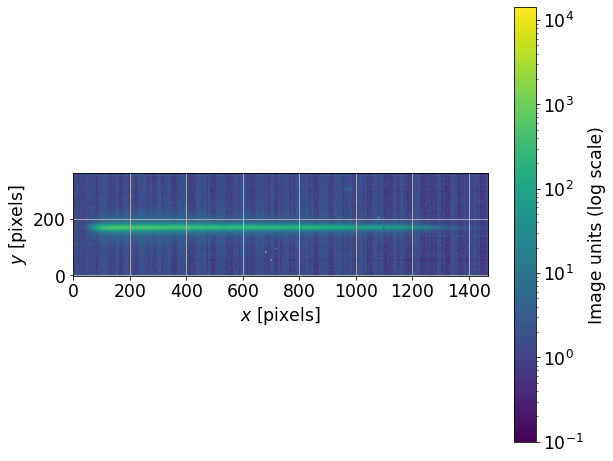

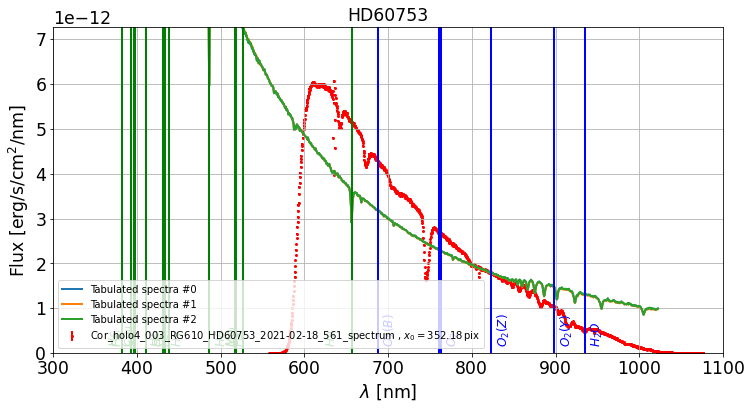

outputs/Cor_holo4_003_RG610_HD60753_2021-02-18_561_spectrogram.fits


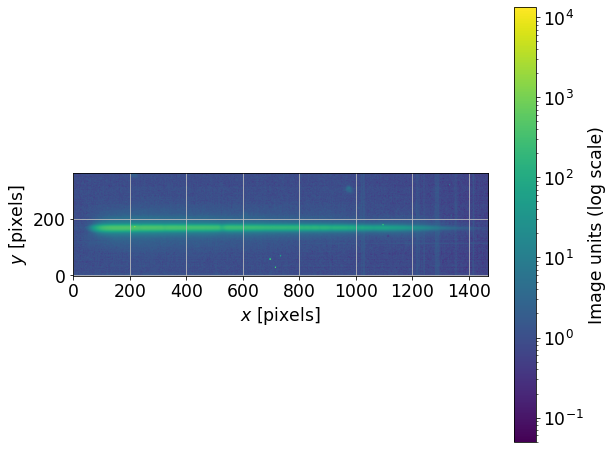

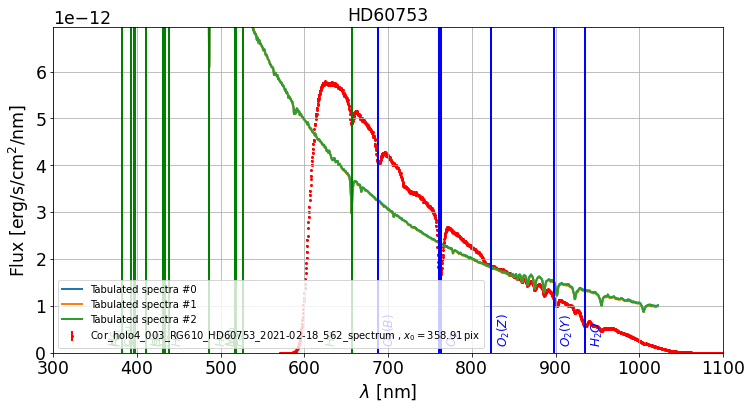

outputs/Cor_holo4_003_RG610_HD60753_2021-02-18_562_spectrogram.fits


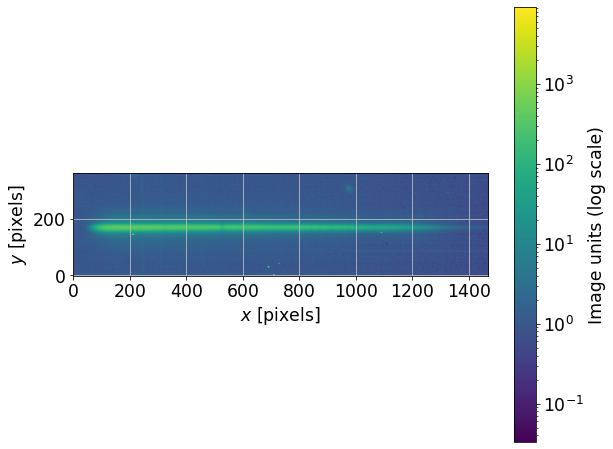

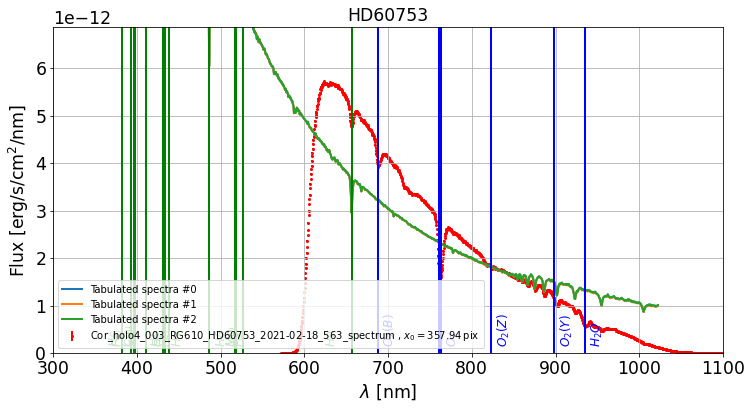

outputs/Cor_holo4_003_RG610_HD60753_2021-02-18_563_spectrogram.fits


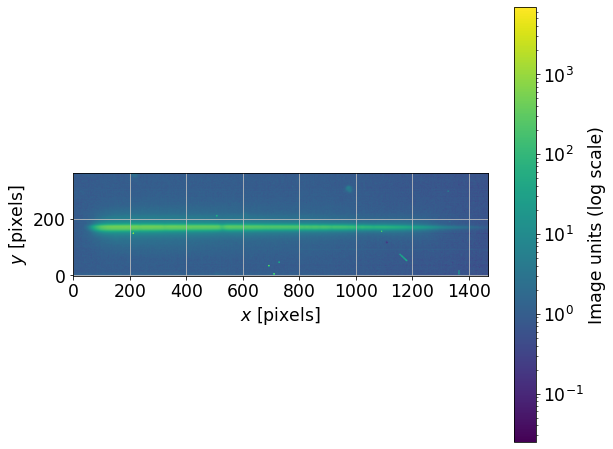

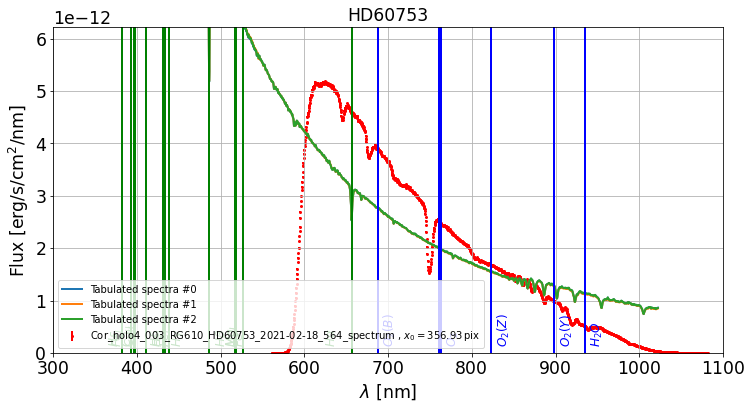

outputs/Cor_holo4_003_RG610_HD60753_2021-02-18_564_spectrogram.fits


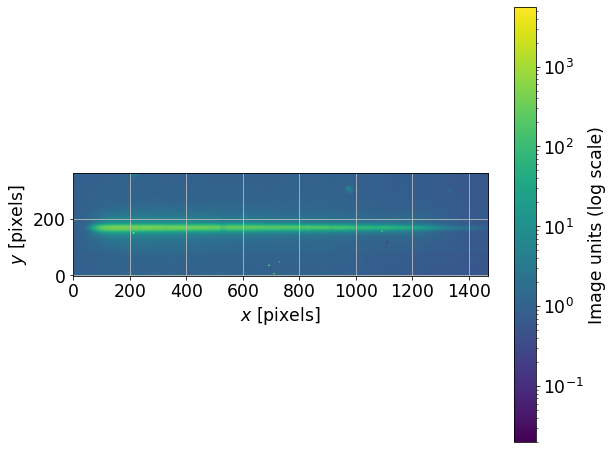

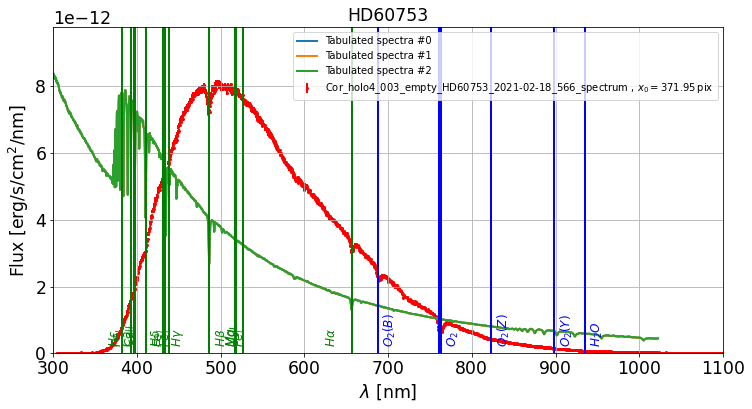

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_566_spectrogram.fits


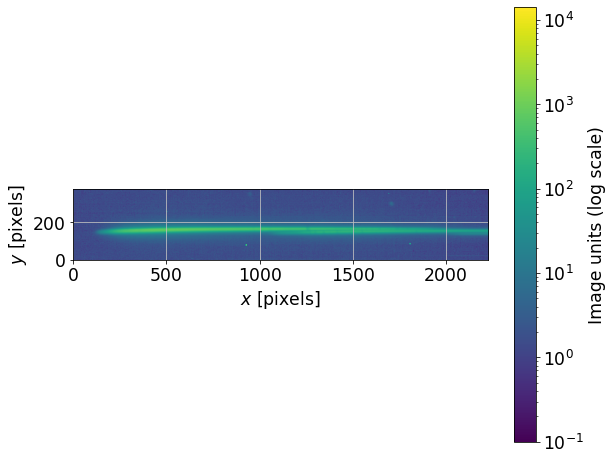

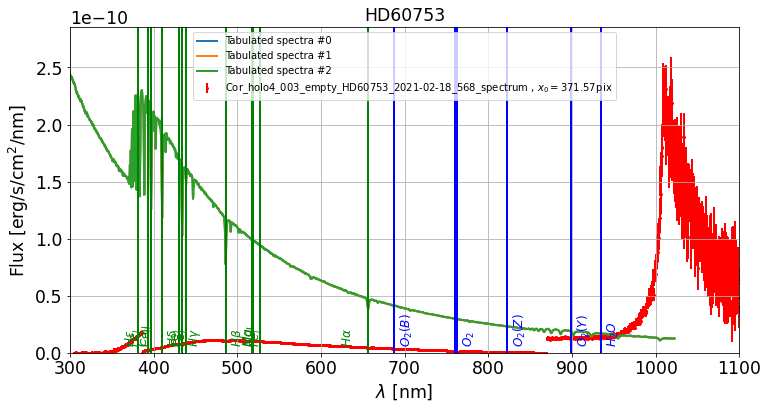

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_568_spectrogram.fits


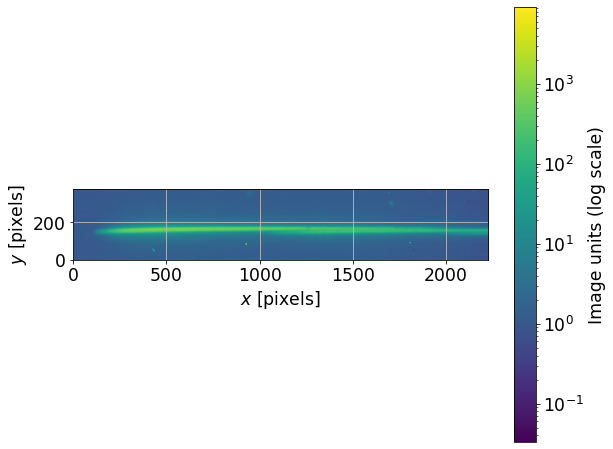

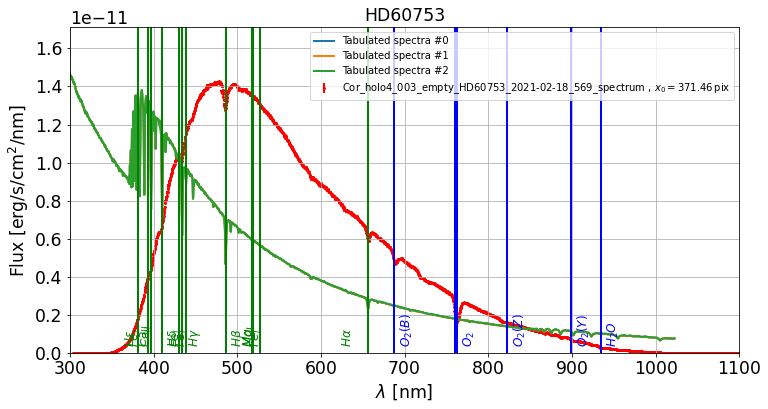

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_569_spectrogram.fits


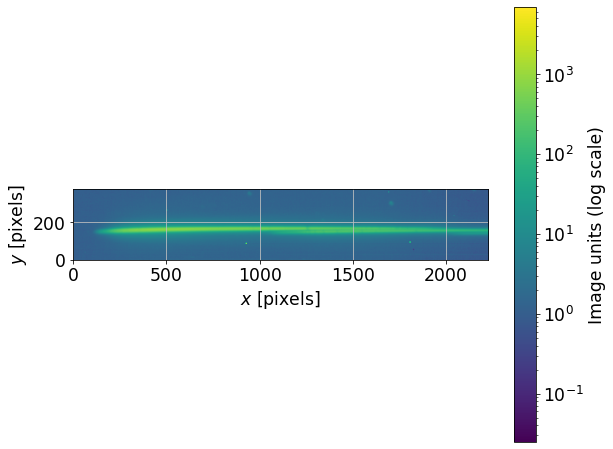

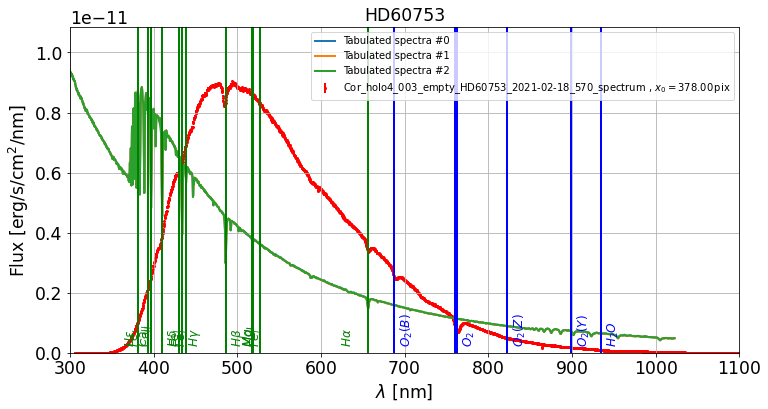

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_570_spectrogram.fits


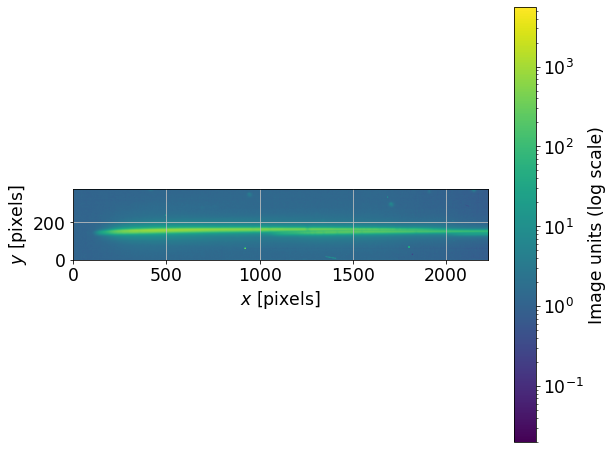

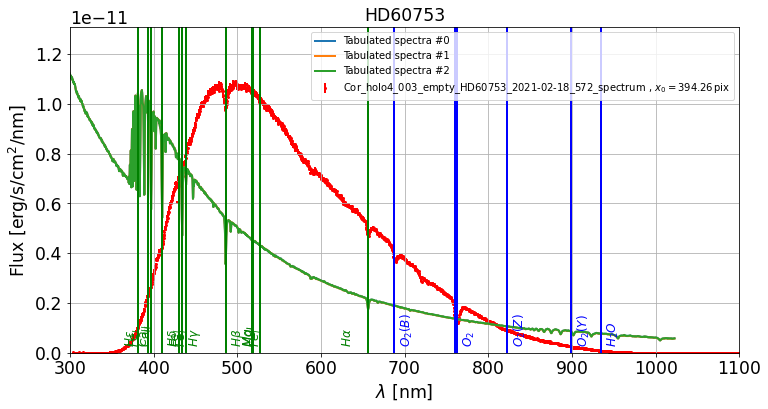

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_572_spectrogram.fits


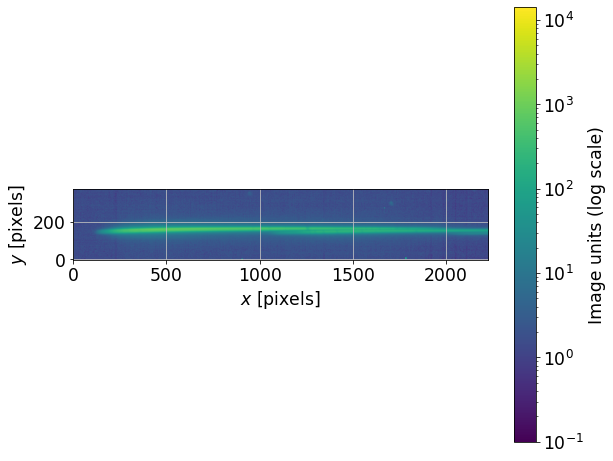

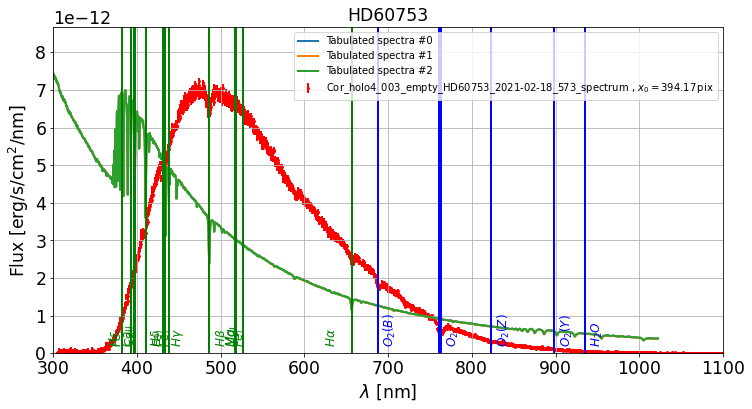

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_573_spectrogram.fits


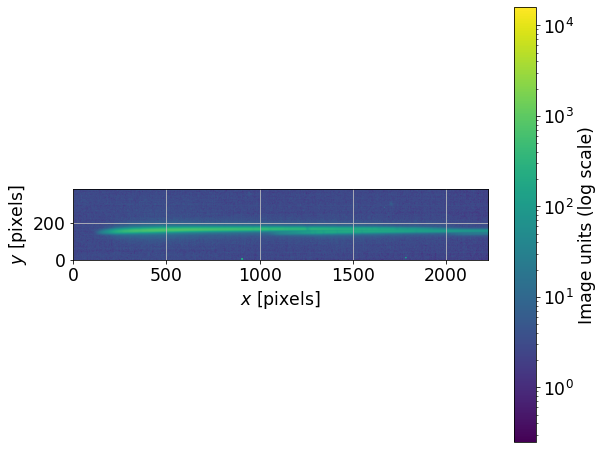

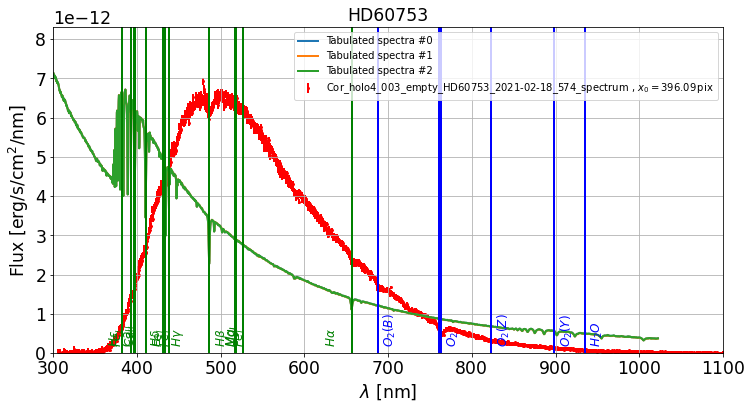

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_574_spectrogram.fits


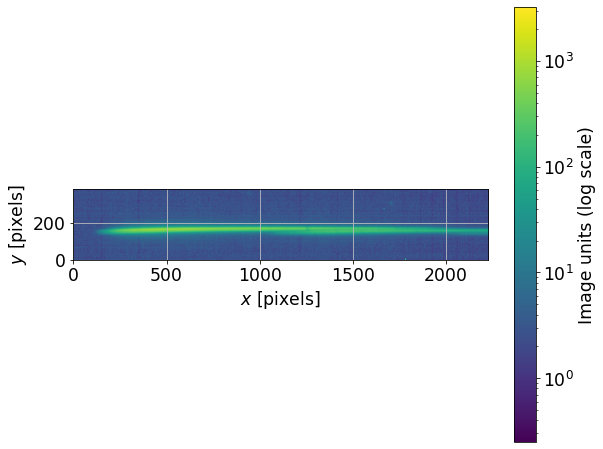

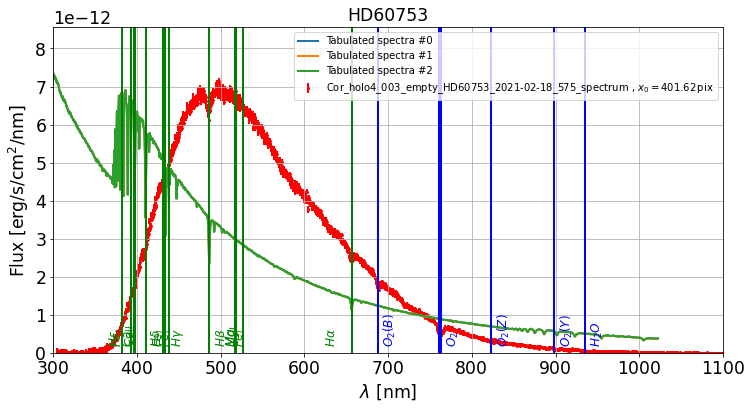

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_575_spectrogram.fits


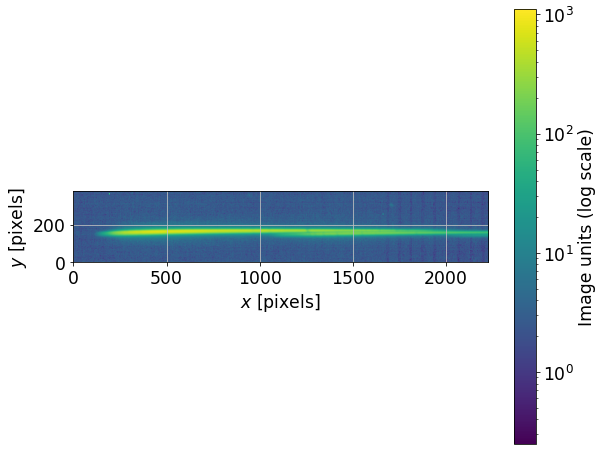

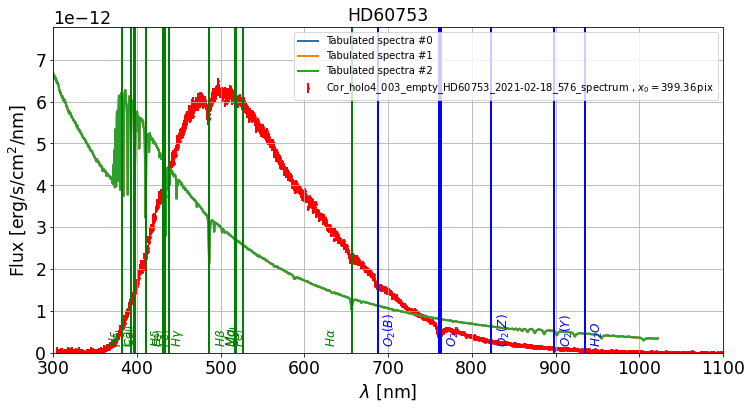

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_576_spectrogram.fits


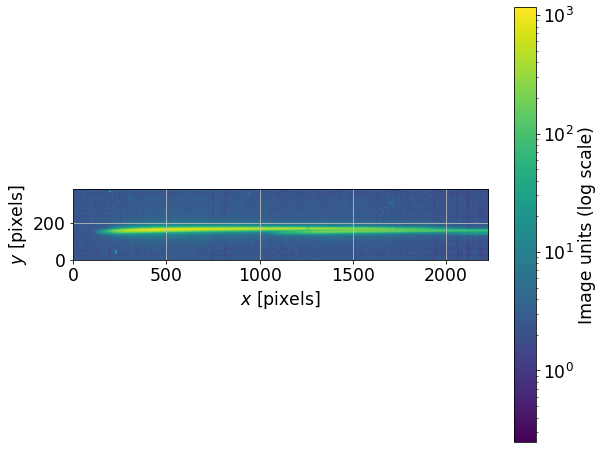

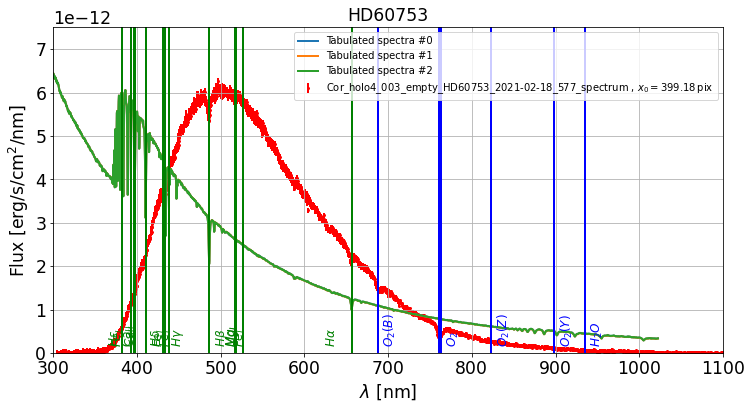

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_577_spectrogram.fits


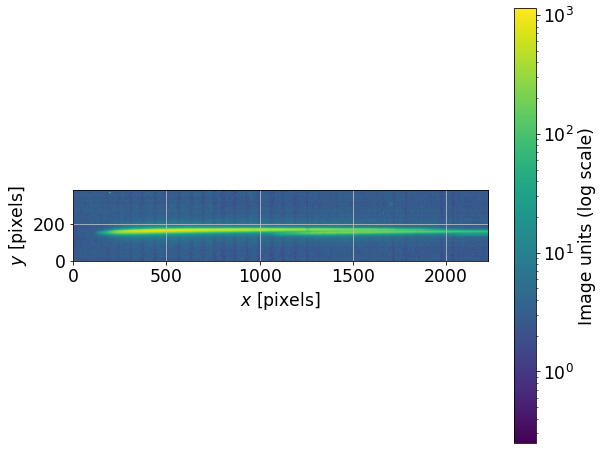

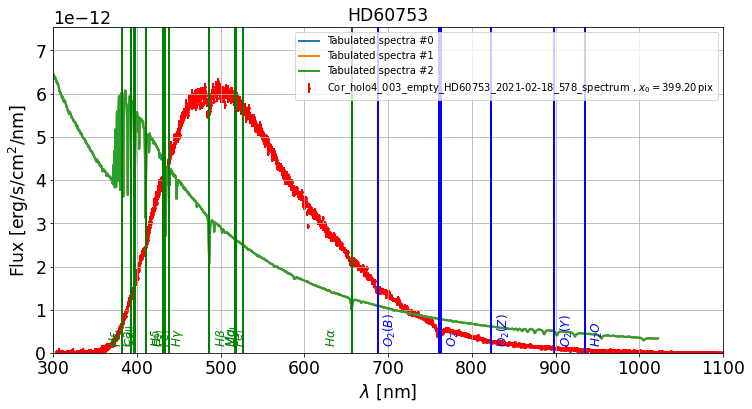

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_578_spectrogram.fits


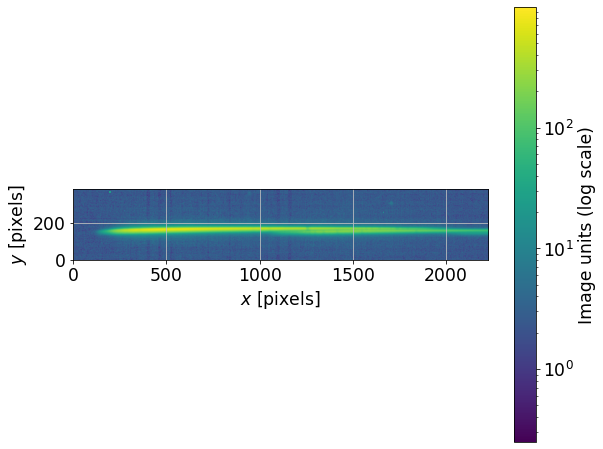

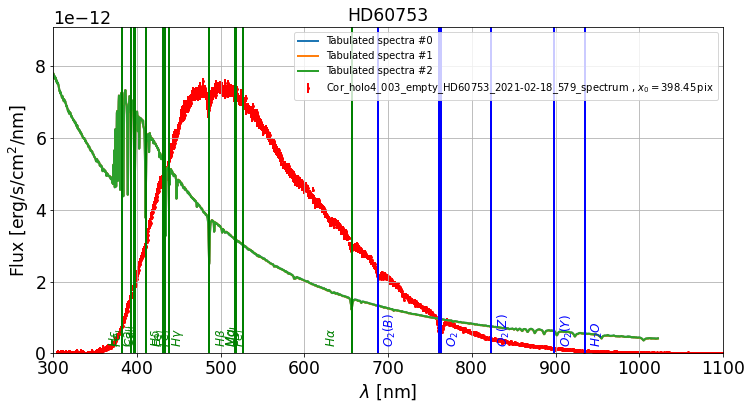

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_579_spectrogram.fits


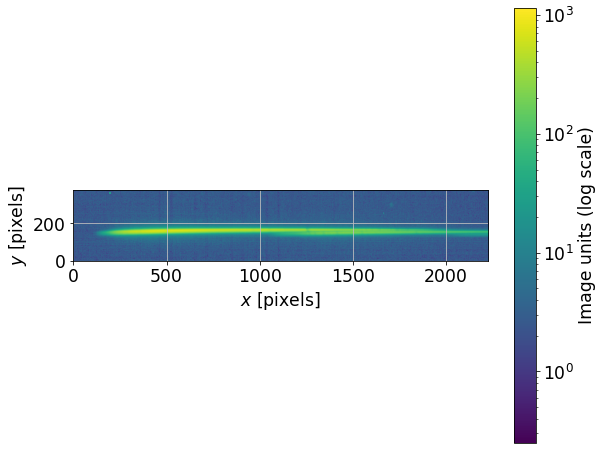

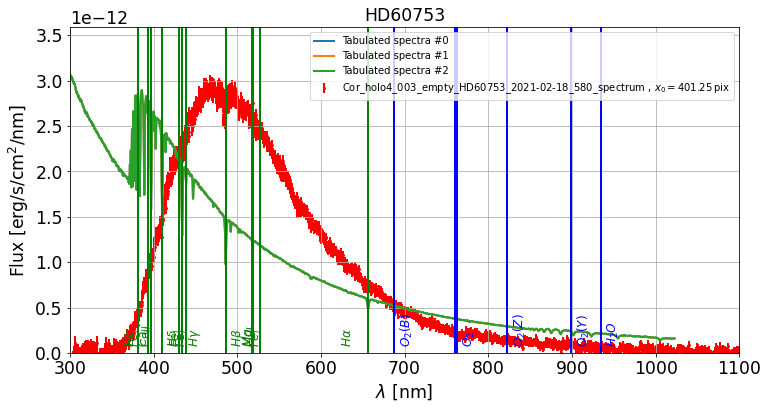

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_580_spectrogram.fits


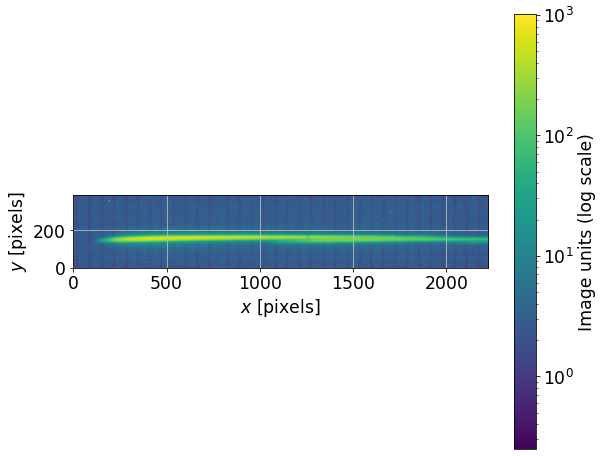

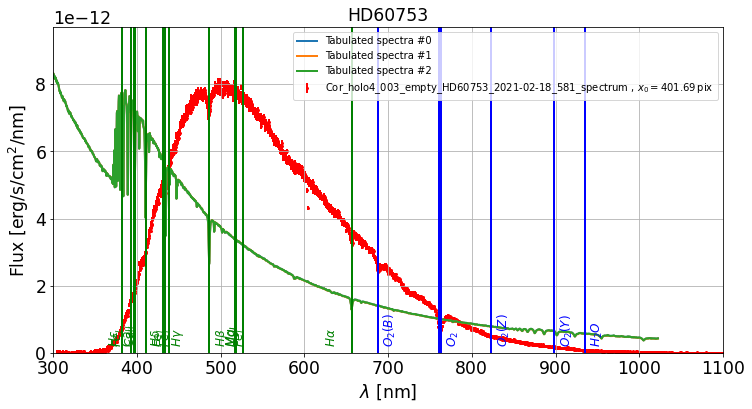

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_581_spectrogram.fits


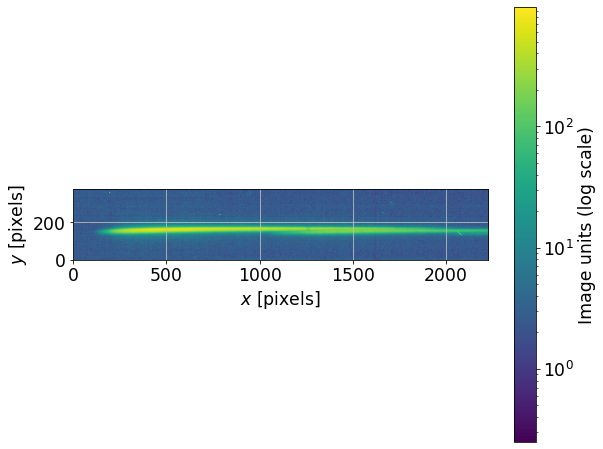

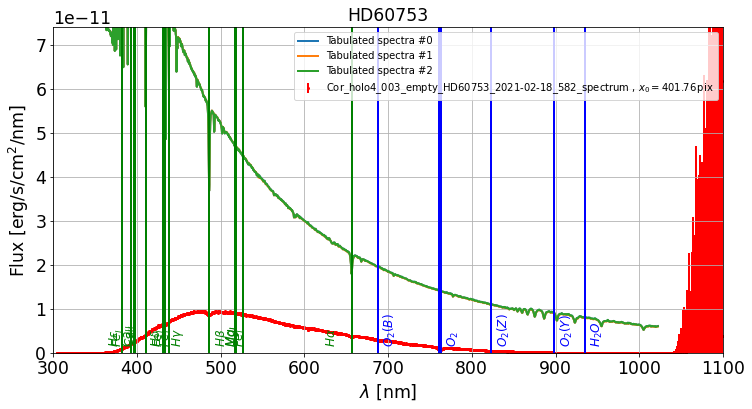

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_582_spectrogram.fits


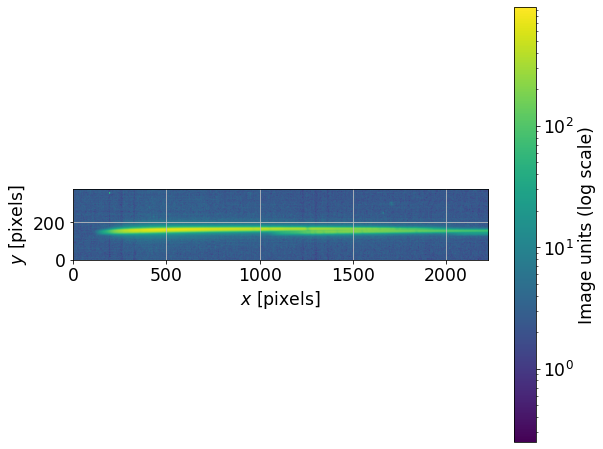

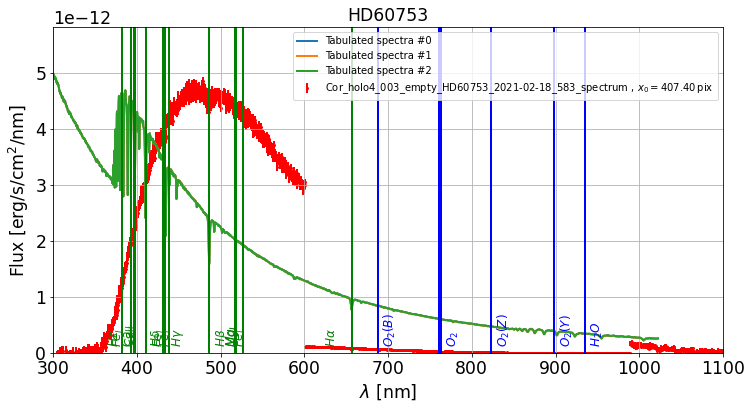

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_583_spectrogram.fits


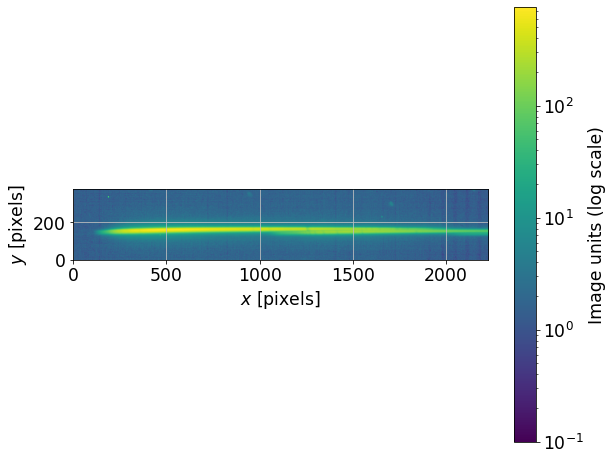

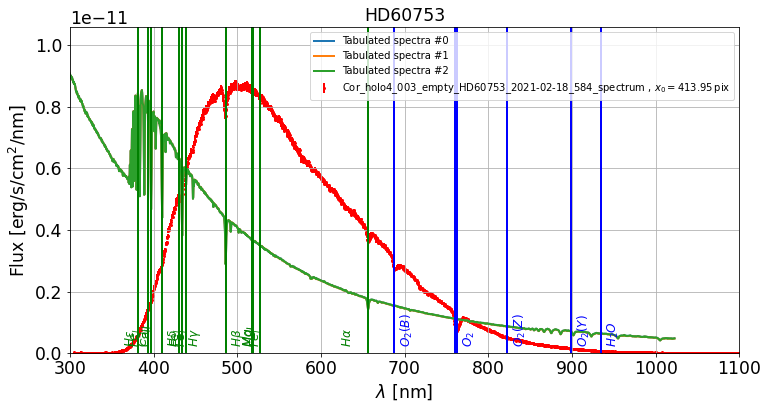

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_584_spectrogram.fits


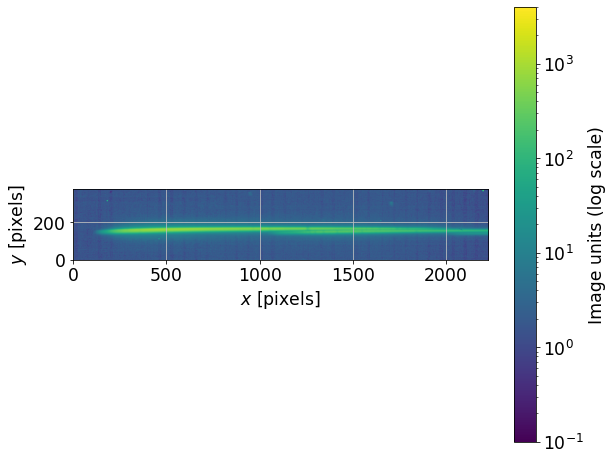

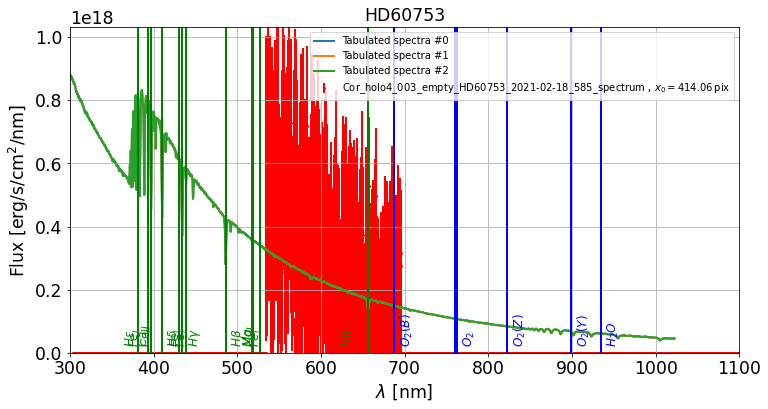

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_585_spectrogram.fits


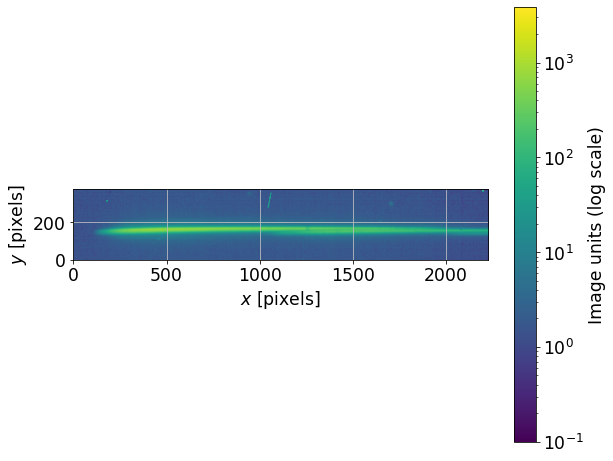

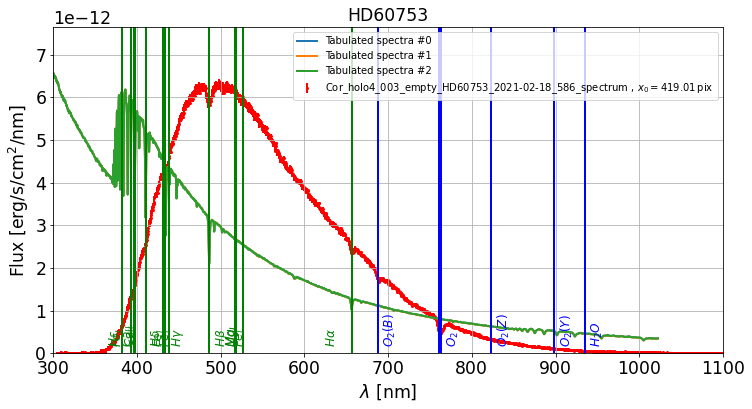

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_586_spectrogram.fits


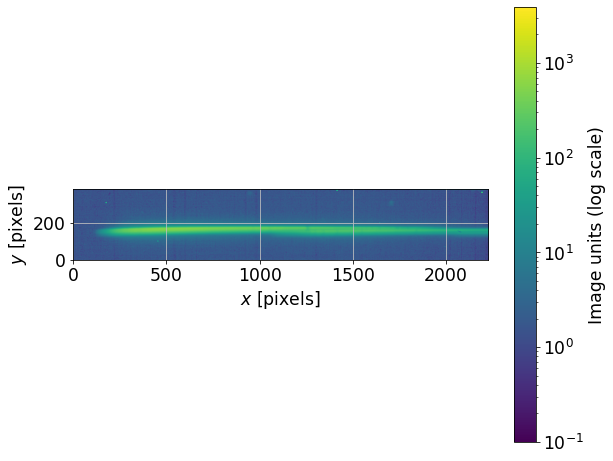

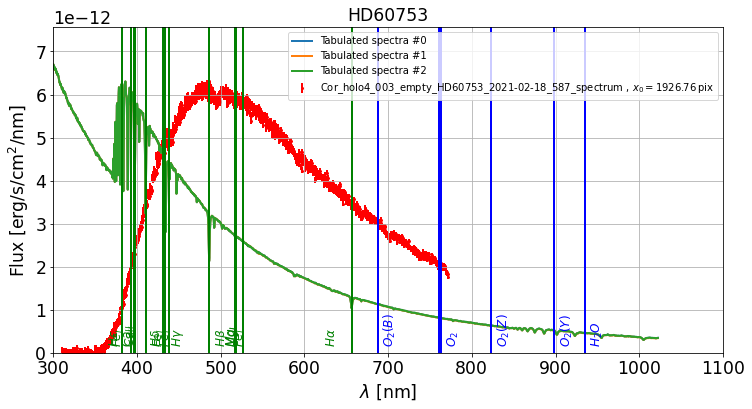

outputs/Cor_holo4_003_empty_HD60753_2021-02-18_587_spectrogram.fits


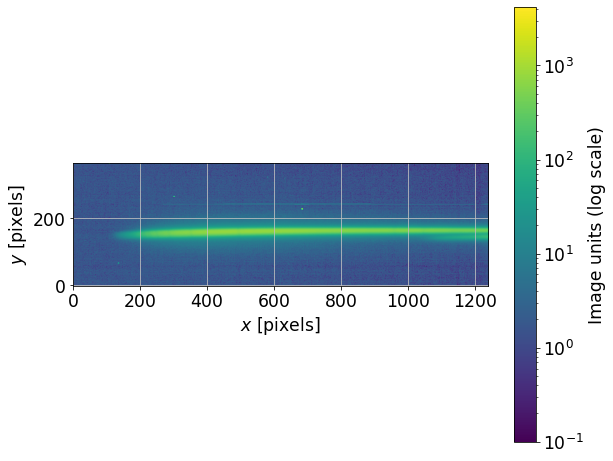

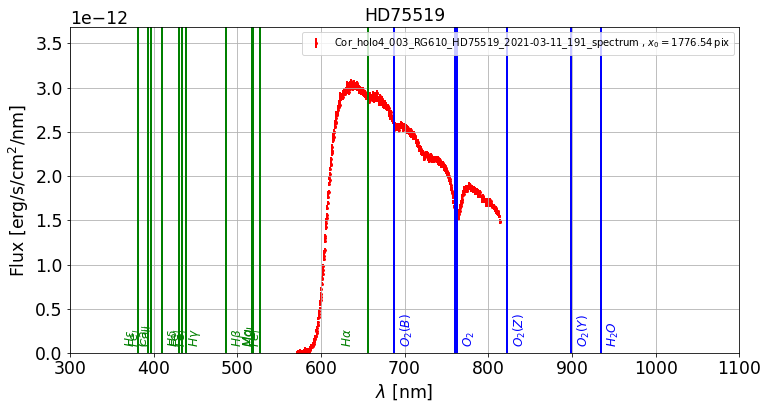

outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_191_spectrogram.fits


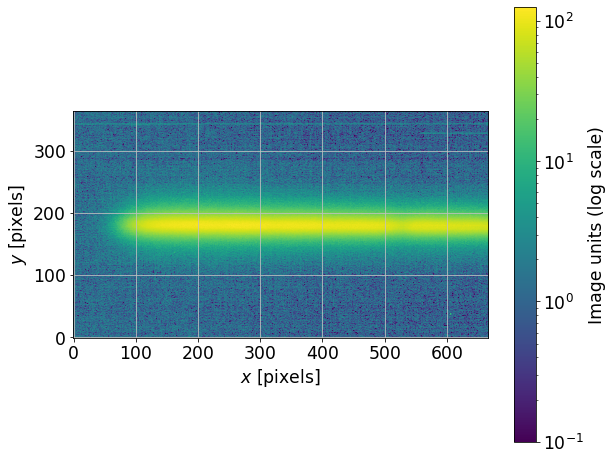

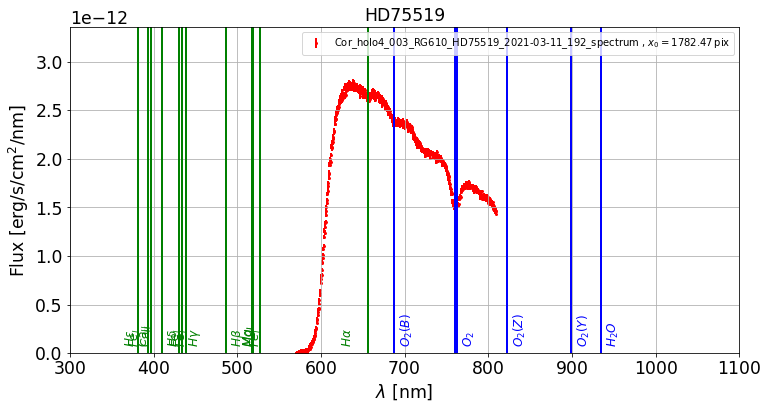

outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_192_spectrogram.fits


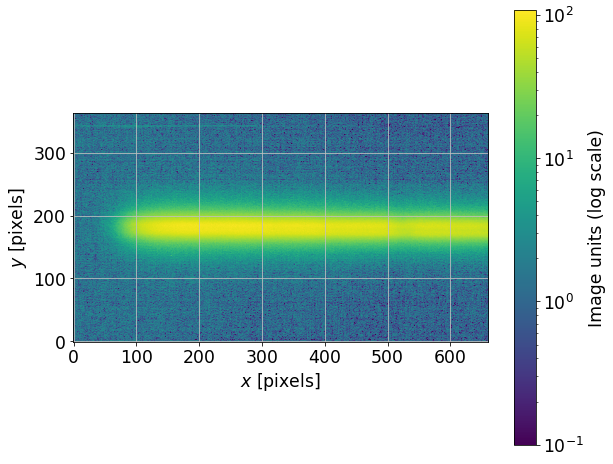

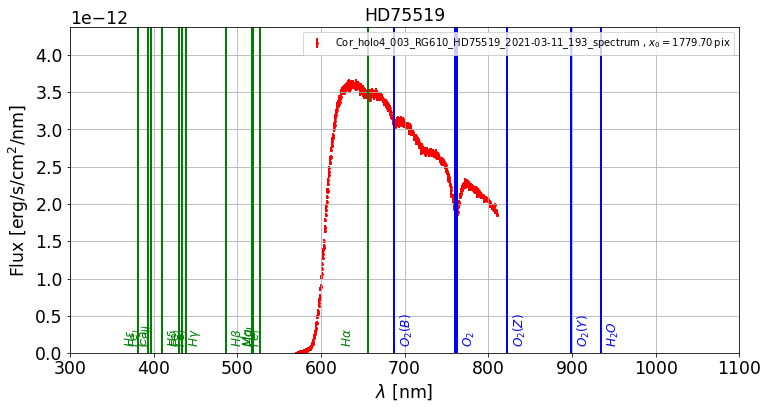

outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_193_spectrogram.fits


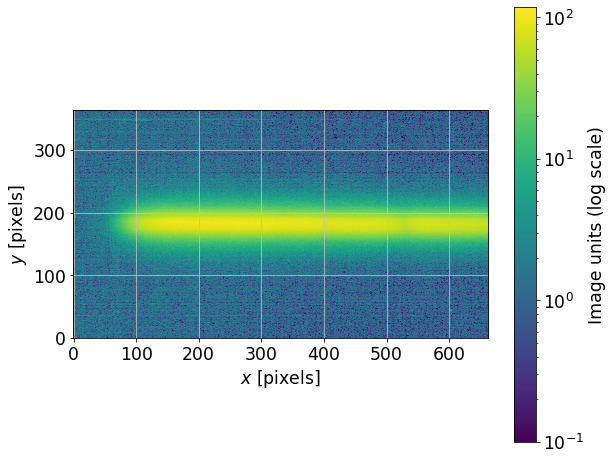

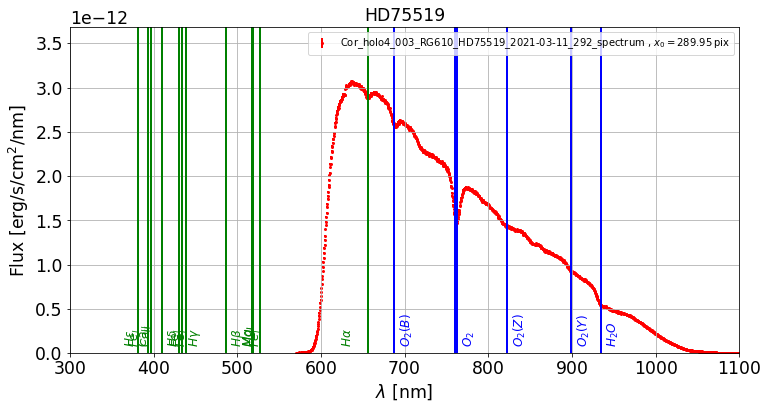

outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_292_spectrogram.fits


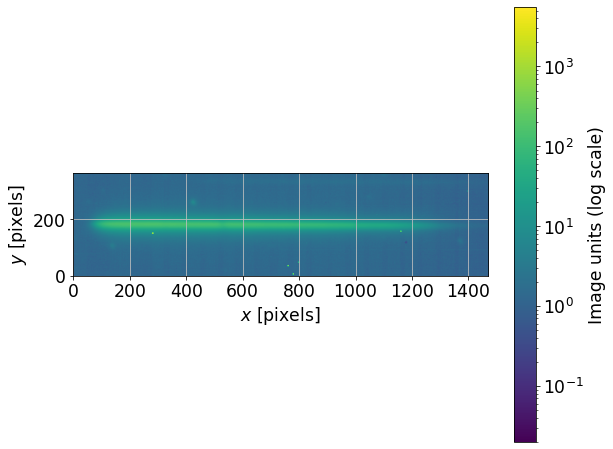

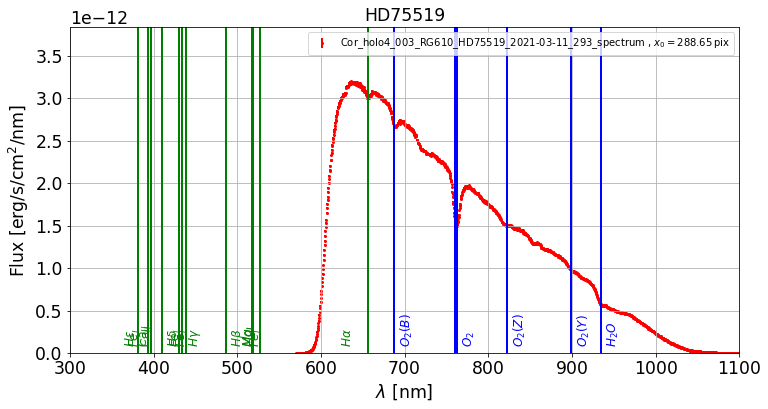

outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_293_spectrogram.fits


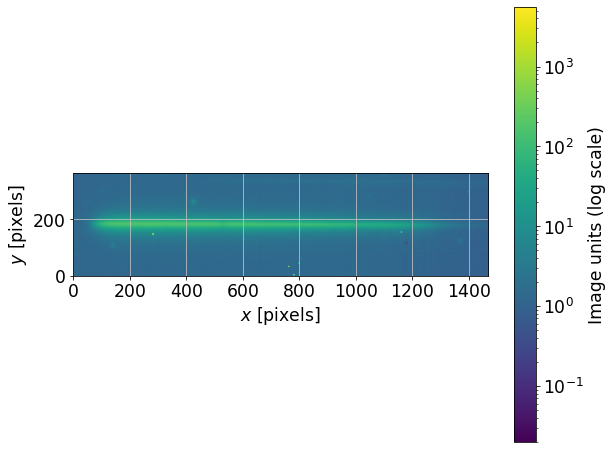

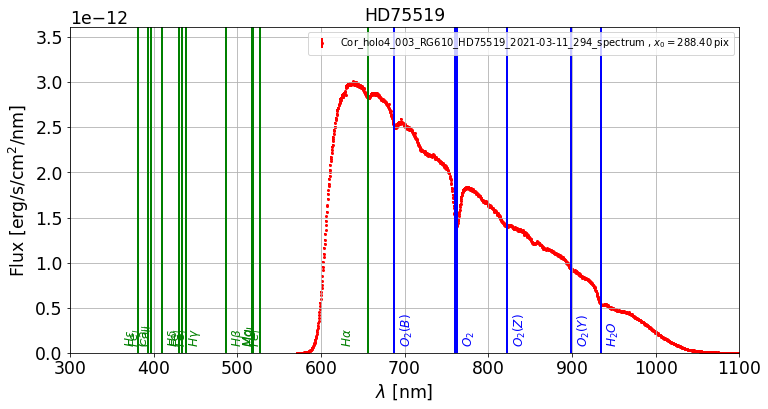

outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_294_spectrogram.fits


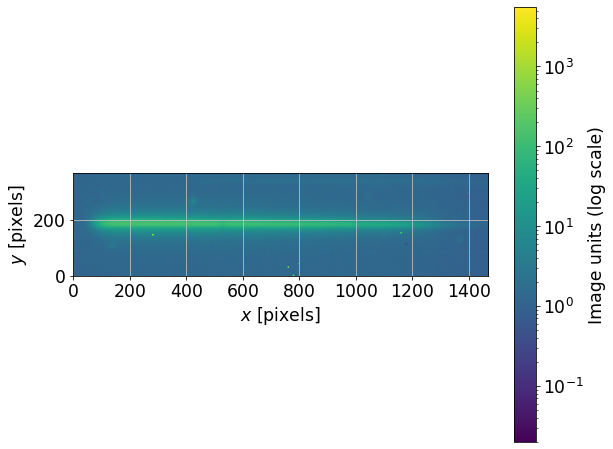

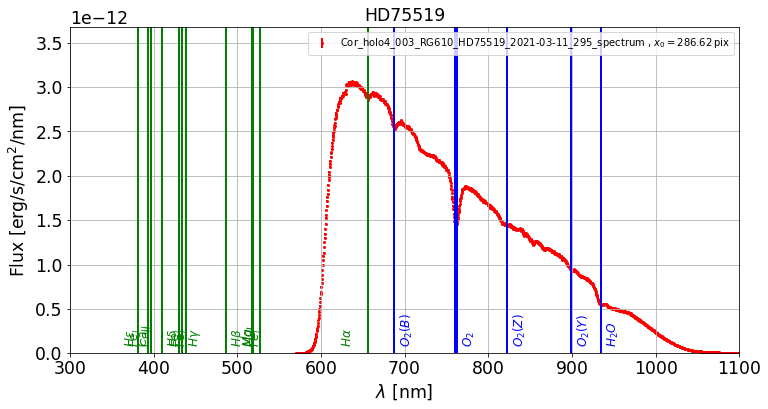

outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_295_spectrogram.fits


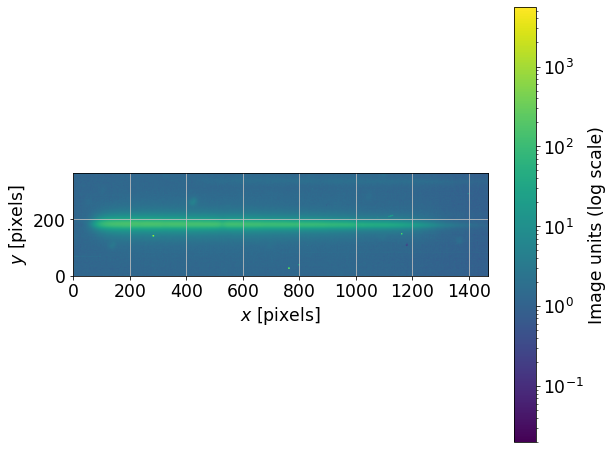

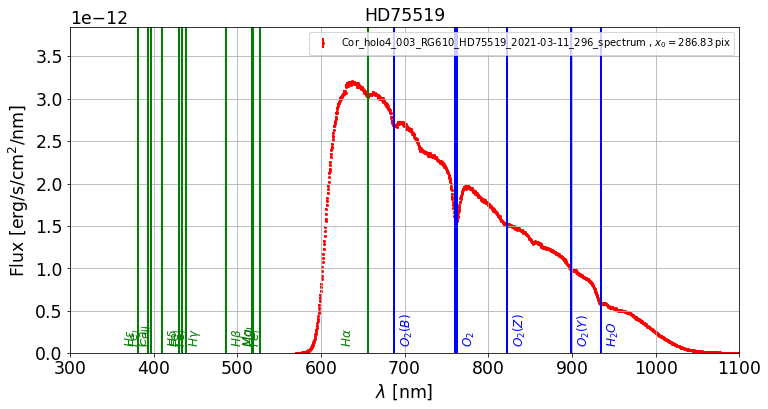

outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_296_spectrogram.fits


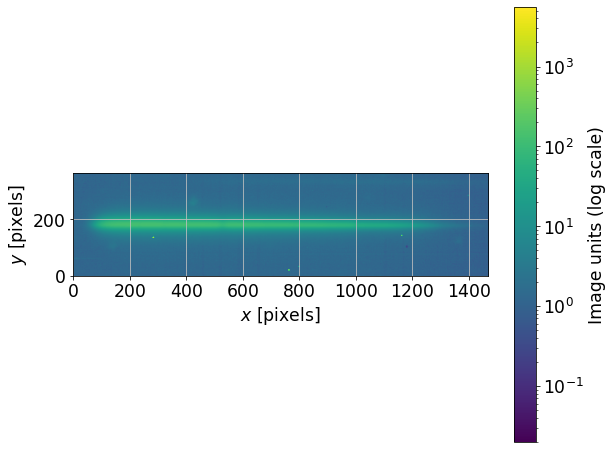

In [18]:
for filename in all_good_spectra_spectrum_files:
    #fig,ax=plt.subplots(111)
    fullfilename = os.path.join(dir_spectra,filename)
    
    s=Spectrum(fullfilename, config="config/auxtel_quicklook.ini")
    label=filename.split('.')[0]+" "
    s.plot_spectrum(force_lines=True,label=label)
    #plt.show()
    fullfilename2=fullfilename.replace("_spectrum","_spectrogram")
    print(fullfilename2)
    s.load_spectrogram(fullfilename2)
    s.plot_spectrogram(scale="log")
    